# Vorlesung Plasmaphysik II
### Electron-cyclotron-resonant heating
19 / 06 / 2022

Assume you want to use a 70 GHz gyrotron for heating a circular plasma with a radius of $a = 0.5$ m
(see figure). The plasma density profile has a parabolic shape $n(r) = n_0(1 − (r/a)^2)$, with a
central density of $n0 = 2\times10^{20}$ m$^{−3}$. As in a plasma torus, the magnetic field, which points
perpendicular to the surface, decays from left to right and can be approximated by $B(r, \theta) = B_0(1 − r\cos(\theta)/R_0)$. The central magnetic field strength is $B_0 = 2.5$T and the major radius of the torus is $R_0 = 1.5$ m.

Calculate and plot the contours of the following cutoffs and resonances within the circular plasma cross-section.

* The electron cyclotron resonance
* The O-mode cutof
* The X-mode cutofs
* The upper-hybrid resonance.

Discuss the possibilities to use electron-cyclotron-resonant heating in this configuration. How is heating possible?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as spc

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

qe = spc.elementary_charge # C
mp = spc.proton_mass # kg
me = spc.electron_mass # kg
ε0 = spc.epsilon_0 # F/m

In [2]:
n0_ = 2e20 # m^-3 : central density
B0_ = 2.5  # T    : central magnetic field strength
a_  = 0.5  # m    : minor radius of the torus
ω0_ = 70e9*2*np.pi # rad/sec : heating frequency
R0_ = 1.5  # m    : major radious of the torus

In [3]:
# r, n0, a, B0, θ, R0 = sp.symbols("r, n_0, a, B_0, θ, R_0")
n = lambda r: n0_*(1-(r/a_)**2)
B = lambda r,θ: B0_*(1 - r*np.cos(θ)/R0_)

ω_ce = lambda r,θ: -qe*B(r,θ)/me # Electron cyclotron resonance
ω_ci = lambda r,θ: qe*B(r,θ)/mi  # Ion cyclotron resonance
ω_pi = lambda r: np.sqrt(qe*qe*n(r)/(mp*ε0)) # Ion plasma frequency
ω_pe = lambda r: np.sqrt(qe*qe*n(r)/(me*ε0)) # Electron plasma frequency
ω_cut = lambda sign,r,θ: 0.5*( np.sqrt(ω_ce(r,θ)*ω_ce(r,θ) + 4*ω_pe(r)*ω_pe(r)) + sign*ω_ce(r,θ) ) # X-mode
ω_UH = lambda r,θ: np.sqrt( ω_pe(r)*ω_pe(r) + ω_ce(r,θ)*ω_ce(r,θ) ) # upper hybrid resonance

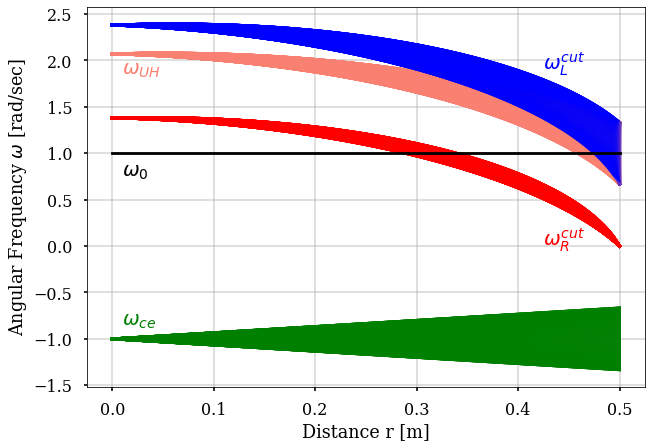

In [4]:
plt.figure(figsize=(10,7))
r_ = np.linspace(0,a_,200)
theta_ = np.linspace(0,2*np.pi,360)

for th in theta_:
    plt.plot(r_,ω_UH(r_,th)/ω0_, c="salmon",alpha=0.3)
    plt.plot(r_,ω_cut(+1,r_,th)/ω0_, c="r",alpha=0.3)
    plt.plot(r_,ω_cut(-1,r_,th)/ω0_,c="b",alpha=0.3)
    plt.plot(r_,ω_ce(r_,th)/ω0_, c="g",alpha=0.3)

plt.plot(r_, np.ones(len(r_)),c="k")
plt.text(0.01,0.75,"$\\omega_0$",fontsize=20)
plt.text(0.425,0,"$\\omega^{cut}_R$",fontsize=20, c="r")
plt.text(0.425,1.9,"$\\omega^{cut}_L$",fontsize=20, c="b")
plt.text(0.01,1.85,"$\\omega_{UH}$",fontsize=20, c="salmon")
plt.text(0.01,-0.85,"$\\omega_{ce}$",fontsize=20, c="g")

plt.xlabel("Distance r [m]")
plt.ylabel("Angular Frequency $\\omega$ [rad/sec]")
plt.grid(alpha=0.5);